# The code is used to simulate an Conventional Internal Combustion Engine with an AI controller

## The vehicle runs over a NEDC and returns the Fuel Cunsumption at the end of the cycle 

### The code was developed for a part of my master thesis "Increase Energy Efficiency of a PHEV using Deep Learning Methods"

In [2]:
import numpy as np
import scipy
import pandas as pd
from scipy.interpolate import interp1d,griddata,interp2d, LinearNDInterpolator,RegularGridInterpolator
from scipy.interpolate import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
from scipy import io
import os
%load_ext autoreload
%autoreload 2
from scipy import io
from scipy.interpolate import interpolate
import numpy as np
import matplotlib.pyplot as plt
os.chdir(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning')
import Utilities_PHEV_new as UT
from AwesomeICE import ICE

import keras.backend as K 
import keras
from keras.callbacks import TensorBoard
from keras.models import load_model
from GA import GA
import datetime


Using TensorFlow backend.


In [3]:
model,modelPython = UT.Create_Model(6,[8,6,5],5) # Bigger Model

y = model.get_weights()
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [4]:
velFile = r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\NEDC_mps_SingleCycle.dat'
d = np.loadtxt(velFile)[:,:1]

In [5]:
vhc = ICE(velFile,modelPython,{'mass':1930,'SOC_init':15,'SOC_min':15})
vhc.RunSimulation()

completed simulation 11013.228000000074 0.0


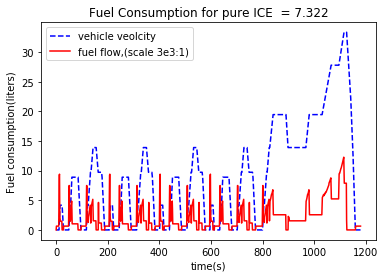

In [6]:

plt.plot(vhc.vehSpeed,'b--',label='vehicle veolcity')
plt.plot(vhc.fuelFlow*3000,'r',label='fuel flow,(scale 3e3:1)')
vhc.fuelFlow.sum()*1000*100/vhc.x[-1]
plt.xlabel('time(s)')
plt.ylabel('Fuel consumption(liters)')

plt.legend(loc='upper left')
plt.title('Fuel Consumption for pure ICE  = %.3f' % (vhc.fuelFlow.sum()*1000*100/vhc.x[-1]))
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\pureIceFule',dpi=300)

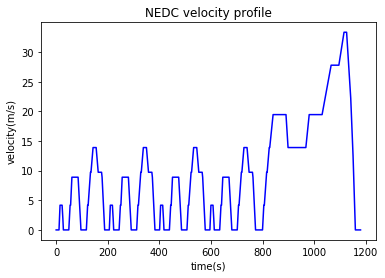

In [7]:
plt.plot(vhc.vehSpeed,'b')
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')

# plt.legend(loc='upper left')
plt.title('NEDC velocity profile')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\nedc',dpi=300)

In [8]:
wltc = r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\NEDC_mps_SingleCycle.dat'
wltcc = np.loadtxt(wltc)[:,:1]

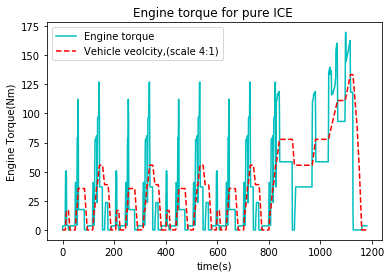

In [9]:
plt.plot(vhc.engTorque,'c',label= 'Engine torque')
plt.plot(vhc.vehSpeed*4,'r--',label='Vehicle veolcity,(scale 4:1)')
plt.xlabel('time(s)')
plt.ylabel('Engine Torque(Nm)')

plt.legend(loc='upper left')
plt.title('Engine torque for pure ICE ')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\pureIcetrq',dpi=300)

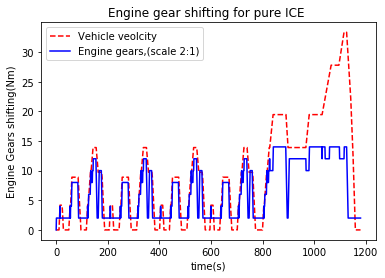

In [10]:

plt.plot(vhc.vehSpeed,'r--',label='Vehicle veolcity')
plt.plot(vhc.engGear*2,'b',label= 'Engine gears,(scale 2:1)')
plt.xlabel('time(s)')
plt.ylabel('Engine Gears shifting(Nm)')

plt.legend(loc='upper left')
plt.title('Engine gear shifting for pure ICE ')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\pureIcegear',dpi=300)

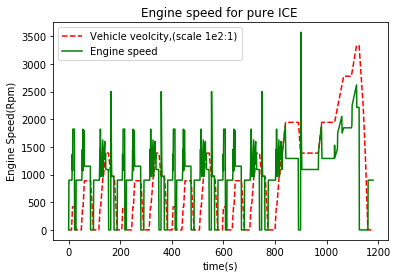

In [24]:

plt.plot(vhc.vehSpeed*100,'r--',label='Vehicle veolcity,(scale 1e2:1)')
plt.plot(vhc.engRPM,'g',label= 'Engine speed')
plt.xlabel('time(s)')
plt.ylabel('Engine Speed(Rpm)')

plt.legend(loc='upper left')
plt.title('Engine speed for pure ICE ')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\pureIcespeed',dpi=300)

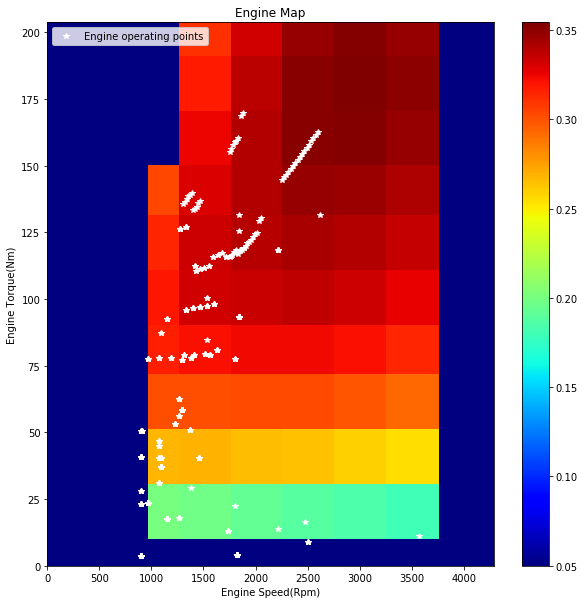

In [12]:
iPos = vhc.engTorque>0
xx,yy = np.meshgrid(np.linspace(0,vhc.engRPM.max()*1.2,200),np.linspace(0,vhc.engTorque.max()*1.2,100))
plt.figure(figsize=(10,10))
plt.pcolor(xx,yy,np.array(vhc.EngineMap((xx.ravel(),yy.ravel())).reshape(xx.shape)),cmap='jet')
plt.colorbar()
plt.plot(vhc.engRPM[iPos],vhc.engTorque[iPos],'*w',label='Engine operating points')
plt.xlabel('Engine Speed(Rpm)')
plt.ylabel('Engine Torque(Nm)')
plt.legend(loc='upper left')
plt.title('Engine Map')
# plt.plot(vehicleForGAOptmized.engRPM/100,label='rpm')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\pureIceEnginemap',dpi=300)

In [13]:
os.chdir(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning')
data = io.loadmat(r'dan2')

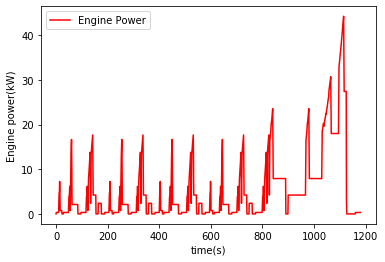

In [17]:
plt.plot(vhc.engPower/1000,'r',label='Engine Power')
plt.xlabel('time(s)')
plt.ylabel('Engine power(kW)')
plt.legend(loc='upper left')
# plt.title('Engine Map')
# plt.plot(vehicleForGAOptmized.engRPM/100,label='rpm')
plt.savefig(r'C:\SVN\FEoP\Trunk_Branch_Tag\3_Automaker\Branches\Anup_CodeBase\Optimizer\UnitTest\Unsupervised Learning\Plots Final\pureIceEnginepower',dpi=300)

In [166]:
f(1000,155)

0.05